# Esperimento di rutherford
##### Deflessione di particelle alpha su di un atomo di oro

##### Introduzione


L'esperimento consentì a rutherford di scoprire che l'atomo è una struttura sostanzialmente vuota, ovvero che gli elettroni ruotano intorno al nucleo molto distanti da esso.

Per effettuare questo esperimento Rutherford mise sul cammino di un fascio di particelle $\alpha$ una lamina d’oro, che aveva uno spessore di circa 1000 atomi, e si rese conto che soltanto una particella ogni 100000 veniva deviata.
Quando una particella $\alpha$ passava abbastanza vicino al nucleo di oro veniva deviata, questo grazie alla forza di coulomb che è proporzionale a $ \frac{1}{r^2} $ dove $r$ è la distanza tra il nucleo e la particella.

Quantitativamente, considerando una particella $\alpha$ con energia cinetica $T = \frac{1}{2} m v_0^2$ che si muove inizialmente lungo un asse parallelo all'asse x. La deflessione è causata dalla forza elettrica repulsiva che vale in modulo $F = \frac{2 Z e^2}{4 \pi \epsilon_0 r^2}$ dove $Z$ è la carica del nucleo d'oro. Tale forza centrale è conservativa e quindi si conservano durante il moto, che si svolge in un piano, l'energia meccanica e la quantità di moto.
Supponendo inoltre che la particella $\alpha$ abbia massa molto minore di quella dell'atomo di oro allora si può considerare fermo durante l'interazione con la particella.

L'angolo di deflessione $\theta$ è l'angolo tra la direzione della velocità iniziale e finale, esso dipende dal parametro di impatto $b$. Supponendo che la direzione della velocità iniziale della particella $\alpha$ sia parallela all'asse x allora il parametro di impatto è la distanza tra l'asse x e la posizione di partenza della particella.
L'angolo di deflessione è legato al parametro di impatto dalla relazione
$
    \tan\left(\frac{\theta}{2} \right)= \frac{2 Z e^2}{4 \pi \epsilon_0} \frac{1}{m v_0^2 b}
$
Si vede che se $b$ è molto piccolo sono possibili grandi valori di $\theta$: al limite per $b \longrightarrow 0$ si ha che $\theta \longrightarrow \pi$, ovvero la particella $\alpha$ rimbalza indietro.

Il parametro di impatto di ogni singolo urto non è controllabile sperimentalmente, però si può trovare una relazione tra il numero di particelle $\alpha$ deflesse ad un angolo $\theta$ e l'angolo $\theta$ stesso, questa relazione è 
$
    N(\theta) = \frac{N_0}{\sin^4\left(\frac{\theta}{2}\right)}
$
dove $N_0$ è il numero di particelle deflesse con un angolo di $\pi$.


#### Dipendenza di $\theta$ dal parametro di impatto

In [23]:
from matplotlib import projections, style
import numpy as np
import matplotlib.pyplot as plt
from vec3d import vec3d
from integrator import integrator
import scipy.constants as spc
from scipy.optimize import curve_fit

Z1, Z2 = 2, 79                          # Numero atomico delle particelle alpha e oro
Q1, Q2 = Z1 * spc.e, Z2 * spc.e         # carica delle particelle alpha e oro
alphaMass = 2 * spc.proton_mass + 2 * spc.neutron_mass
                                        # Massa in kg della particella alpha
# Costante moltiplicativa per il calcolo del raggio del cerchio da cui partono le particelle alpha
offset = 14

E = 5e6 * spc.electron_volt             # Energia iniziale della particella alpha in joule
F0 = Q1 * Q2 / (4 * np.pi * spc.epsilon_0 * alphaMass)
                                        # Costante moltiplicativa che va davanti a r / r.mod()**3 (N * m^2)

d = F0 / E * alphaMass                  # Scala di lunghezze tipica (N * m^2 / J = m),
                                        # ~ distanza minima tra l'atomo di oro e la particella alpha

In [24]:
def F(r:vec3d, F0):
    return F0 * r / r.mod()**3
# Funzione che devinisce la forza di coulomb

In [25]:
def Parametri(d, Npart):
    raggio = d * offset      # raggio massimo da cui partono le particelle alpha
    b = np.zeros(Npart)      # Vettore con i parametri di impatto
    y = np.zeros(Npart)      # Vettore con i punti y
    z = np.zeros(Npart)      # Vettore con i punti z

# Ciclo che genera punti sul piano yz 
# e controlla che siano all'interno del cerchio con raggio uguale alla variabile raggio
    for i in range(Npart):
        while True:
            y[i] = np.random.uniform(-d * offset, d * offset)
            z[i] = np.random.uniform(-d * offset, d * offset)
            b[i] = np.sqrt(y[i]**2 + z[i]**2)
            if(b[i] <= raggio): 
                break
    return b, y, z            
# restituisce il parametro di impatto, distanza tra asse x e punto di partenza della particella alpha
# e la coordinata y e z che indicano la posizione nel piano yz


In [26]:
Npart = 40000                   # Numero di particelle
theta = np.zeros(Npart)         # Vettore degli angoli di deflessione
np.random.seed()
b, y, z = Parametri(d, Npart)
xList = []                      # Lista per salvare alcune traiettorie
solver = integrator("Verlet")   # Algoritmo per le traiettorie: Velocity Verlet

In [27]:
for i in range(Npart):
    r0 = vec3d(-100 * d, y[i], z[i])             # Distanza della particella alpha dall'origine
    v0 = vec3d(np.sqrt(2 * E / alphaMass), 0, 0) # Velocità iniziale della particella alpha
                                                 # Posizione e velocità iniziali della particella alpha
    tau = d / v0.mod()                           # Tempo caratteristico del problema

    N = int(2 * r0.mod() / d)                    # Numero di step

    t, x, v = solver.Solve(r0, v0, tau, N, lambda x: F(x, F0))

    theta[i] = v0.GetAngle(v[-1])                # Angoli di defflessione
    if(i < 10):                                  # Prende le prime 10 traiettorie
        xList.append(x)

Di seguito la traiettoria di una particella che diffonde su un atomo di oro

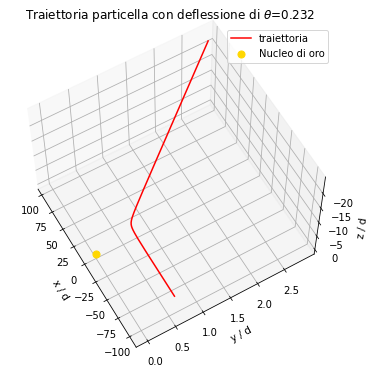

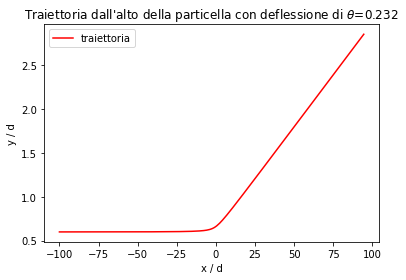

In [28]:
# Traiettoria nello spazio 3d
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection="3d")
ax.view_init(-120, 30)

# Le coordinate sono normalizzate a d, la scala tipica di lunghezze del problema
ax.plot([pos.GetX() / d for pos in x], [pos.GetY() / d for pos in x], [pos.GetZ() / d for pos in x], 
        color="red", label="traiettoria")

ax.scatter(0, 0, 0, s=50, color="gold", label="Nucleo di oro")
ax.set_xlabel("x / d")
ax.set_ylabel("y / d")
ax.set_zlabel("z / d")

ax.set_title(f"Traiettoria particella con deflessione di $\\theta$={round(theta[0], 3)}")
ax.legend()

# Traiettoria dall'alto, piano xy
fig2, ax2 = plt.subplots()
ax2.plot([pos.GetX() / d for pos in x], [pos.GetY() / d for pos in x], color="red", label="traiettoria")
ax2.set_xlabel("x / d")
ax2.set_ylabel("y / d")
ax2.set_title(f"Traiettoria dall'alto della particella con deflessione di $\\theta$={round(theta[0], 3)}")
ax2.legend()


Di seguito il grafico che mostra la dipendenza dell'angolo di deflessione dal parametro di impatto.

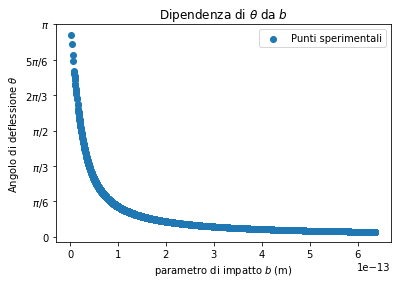

In [29]:
# Grafico della dipendenza di theta dal paramentro di impatto
fig0, ax0 = plt.subplots()
ax0.scatter(b, theta, label="Punti sperimentali")

vals = [0, np.pi / 6, np.pi / 3, np.pi / 2, np.pi * 2 / 3, 5 * np.pi / 6, np.pi]
keys = ["0", "$\pi / 6$", "$\pi / 3$", "$\pi / 2$", "$2\pi / 3$", "$5\pi / 6$", "$\pi$"]
ax0.set_yticks(vals, keys)

ax0.set_xlabel("parametro di impatto $b$ (m)")
ax0.set_ylabel("Angolo di deflessione $\\theta$")

ax0.set_title("Dipendenza di $\\theta$ da $b$")
ax0.legend()

Di seguito l'algoritmo per trovare la costante moltiplicativa $\frac{2 Z e^2}{4 \pi \epsilon_0 m v_0^2}$ di $\frac{1}{b}$.
Si riscontra che la costante calcolata con l'algoritmo "curve_fit" è di ben 2 ordini di grandezza più piccola di quella teorica.

Costante sperimentale = 2.311723388997039e-14
Deviazione standard(errore algoritmico) = 4.425207847045834e-36
Costante teorica = 1.797363748617092e-12


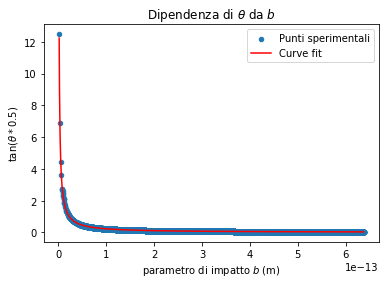

In [40]:
fig1, ax1 = plt.subplots()
constTeorica = (2 * Q2**2)/(4 * np.pi * spc.epsilon_0 * alphaMass * (2 * E / alphaMass))
# costante di proporzionalità che lega 1 / b all'angolo di deflessione

b_lin = np.linspace(np.min(b), np.max(b), 1000)

def fit(b, a):
    return a / b

pars, cov = curve_fit(fit, b, np.tan(theta/2))
#Algoritmo che cerca di trovare la costante moltiplicativa di 1 / b

ax1.scatter(b, np.tan(theta/2), label="Punti sperimentali", s=20)
ax1.plot(b_lin, fit(b_lin, pars[0]), color="red", label="Curve fit")

ax1.set_title("Dipendenza di $\\theta$ da $b$")
ax1.set_xlabel("parametro di impatto $b$ (m)")
ax1.set_ylabel("$\\tan(\\theta * 0.5)$")
ax1.legend()

# Confronto della costante teorica con quella sperimentale
print("Costante sperimentale =", pars[0])
print("Deviazione standard(errore algoritmico) =", cov[0][0])
print("Costante teorica =", constTeorica)

#### Verifica della distribuzione $N(\theta)$ del numero di particelle diffuse ad un angolo $\theta$

Sono state simulate le traiettorie di $40000$ particelle $\alpha$ salvando per ognuna l'angolo di deflessione.

Si è poi definito un istogramma dividendo gli angoli in varie classi e contando il numero di paricelle che avevano l'angolo di deflessione appartenente a quella classe.
Ci si aspetta che ci siano più traiettorie il cui angolo di deflessione è piccolo e poche il cui angolo di deflessione rientra nella classe che contiene l'angolo di $\pi$.

Di seguito il grafico che contiene le traiettorie delle prime 75 particelle.

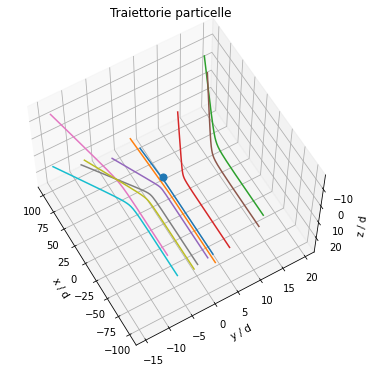

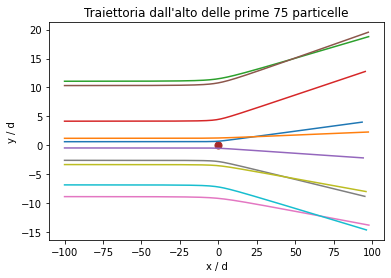

In [31]:
fig3 = plt.figure(figsize=(8,6))
ax3 = plt.axes(projection="3d")
ax3.view_init(-120, 30)

ax3.scatter(0,0,0, s=50)
for traj in xList:
    ax3.plot([pos.GetX() / d for pos in traj], [pos.GetY() / d for pos in traj], [pos.GetZ() / d for pos in traj])
ax3.set_xlabel("x / d")
ax3.set_ylabel("y / d")
ax3.set_zlabel("z / d")

ax3.set_title("Traiettorie particelle")

# Traiettoria dall'alto, piano xy
fig4, ax4 = plt.subplots()
for traj in xList:
    ax4.plot([pos.GetX() / d for pos in traj], [pos.GetY() / d for pos in traj], label="traiettoria")
ax4.set_xlabel("x / d")
ax4.set_ylabel("y / d")
ax4.set_title(f"Traiettoria dall'alto delle prime 75 particelle")
ax4.scatter(0,0, s=50, color="brown")

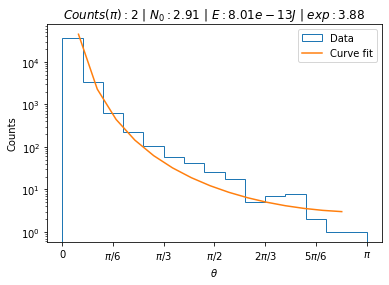

In [33]:
fig5, ax5 = plt.subplots()
nbins = 15
ax5.hist(theta, histtype = "step", bins = nbins, label = "Data", range = (0, np.pi))
ax5.set_yscale("log")
ax5.set_xlabel("$\\theta$")
ax5.set_ylabel("Counts")

vals = [0, np.pi / 6, np.pi / 3, np.pi / 2, np.pi * 2 / 3, 5 * np.pi / 6, np.pi]
keys = ["0", "$\pi / 6$", "$\pi / 3$", "$\pi / 2$", "$2\pi / 3$", "$5\pi / 6$", "$\pi$"]
ax5.set_xticks(vals, keys)

# Funzione di cui si devono trovare i parametri norm ed exp
def fit(theta, norm, exp):
    return norm / np.sin(theta / 2)**exp

counts, bins = np.histogram(theta, bins = nbins)
bins = bins[1:] - (bins[1] - bins[0]) / 2

#Calcolo dei parametri con l'algoritmo curve_fit
pars, cov = curve_fit(fit, bins, counts, p0 = [counts[-1], 2], sigma = counts)

ax5.plot(bins, fit(bins, pars[0], pars[1]), label="Curve fit")

#Numero di deflessioni di pigreco nella simulazione
conteggiPigreco = counts[-1]
#Parametro N0 calcolato con l'algoritmo curve_fit
N0 = round(pars[0], 2)
# Parametro exp calcolato con l'algoritmo
exponent = round(pars[1], 2)
ax5.set_title(f"$Counts(\pi): {conteggiPigreco}$ | $N_0: {N0}$ | $E: {E:.3} J$ | $exp: {exponent}$")
plt.legend()

Dal grafico precendente si può notare che l'esponente calcolato con l'algoritmo "curve_fit" è molto vicino al valore vero:

In [34]:
# esponente con deviazione standard 
print("esponente =", round(pars[1], 2))
print("Deviazione standard =", round(cov[1][1], 2))

esponente = 3.88
Deviazione standard = 0.02


Si deduce che con l'aumentare del numero di particelle e quindi del numero di bins dell'istogramma questo valore dell'esponente tenda al valore vero.

#### Dipendenza di $N_0$ dall'energia

Nell'ultimo punto si è calcolata la dipendenza di $N_0$ dall'energia cinetica iniziale per un range da $0.6MeV$ a $5MeV$ mantenendo costante la distanza iniziale delle particelle $\alpha$ dall'atomo posizionato nell'origine.

In [6]:
Npart = 40000
offset = 10
solver = integrator("Verlet")
np.random.seed()
# Array delle energie
Energie = np.linspace(0.6e6 * spc.electron_volt, 5e6 * spc.electron_volt, 10)
# Array delle lunghezze tipiche del problema
d = F0 / Energie * alphaMass
# Siccome la posizione iniziale delle particelle deve essere costante
# si è definita la lunghezza tipica media
d_media = (d[-1] + d[0]) / 2
# Infine si sono calcolate le posizioni iniziali
b, y, z = Parametri(d_media, Npart)
# Definisco theta array (Npart x numero di energie)
theta = np.zeros((Npart, np.size(Energie)))

In [ ]:
for j in range(np.size(Energie)):
    for i in range(Npart):
        # Distanza della particella alpha dall'origine
        r0 = vec3d(-100 * d_media, y[i], z[i])
        # Velocità iniziale della particella alpha               
        v0 = vec3d(np.sqrt(2 * Energie[j] / alphaMass), 0, 0)
        
        # Tempo caratteristico del problema
        tau = d[j] / v0.mod()

        # Numero di step per l'integrazione
        N = int(2 * r0.mod() / d[j])

        t, x, v = solver.Solve(r0, v0, tau, N, lambda x: F(x, F0))

        # Angoli di defflessione
        theta[i][j] = v0.GetAngle(v[-1])

In [19]:
# Funzione che deve approssimare l'andamento dei dati
def fit(theta, norm, exp):
    return norm / np.sin(theta / 2)**exp

# Array di N_0
N0s = np.zeros(np.size(Energie))
# Array delle deviazioni standard di N_0
errN0s = np.zeros(np.size(Energie))
# Numero di classi per l'istogramma
nbins = 12

# Ciclo che deve iterare per ogni energia per trovare i valori di N_0
for i in range(np.size(Energie)):
    counts, bins = np.histogram(theta[:,i], bins = nbins)
    bins = bins[1:] - (bins[1] - bins[0]) / 2
    #Funzione che restituisce i parametri norm ed exp da inserire nella funzione di fit
    pars, cov = curve_fit(fit, bins, counts, p0 = [counts[-1], 2], sigma = counts)
    # Salva i valori di N0 e gli errori
    N0s[i] = pars[0]
    errN0s[i] = cov[0][0]

La relazione che lega $N_0$ all'energia è del tipo $\frac{const}{Energia^2}$, per verificare ciò si è utilizzato l'algoritmo "curve_fit" calcolando l'esponente e la costante moltiplicativa.

N0 = a * (1 / E**b)
parametro a: 5.816193585415821e-29 +- 1.9998297590183495e-55
parametro b: 2.275354395148991 +- 0.07261616255410144


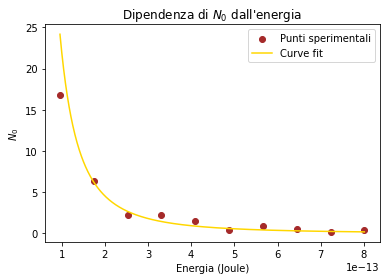

In [20]:
fig6, ax6 = plt.subplots()
# Grafico per i punti sperimentali, N0 in funzione dell'energia
ax6.scatter(Energie, N0s, label="Punti sperimentali", color="brown")
# Energie per il fit della curva
E_fit = np.linspace(0.6e6 * spc.electron_volt, 5e6 * spc.electron_volt, 1000)

ax6.set_xlabel("Energia (Joule)")
ax6.set_ylabel("$N_0$")

ax6.set_title("Dipendenza di $N_0$ dall'energia")

# Funzione che deve approssimare l'andamento dei dati, N_0 in funzione dell'energia
def N0fit(E, a, b):
    return a * 1 / E**b

pars, cov = curve_fit(N0fit, Energie, N0s, sigma=errN0s, maxfev=800)
ax6.plot(E_fit, N0fit(E_fit, pars[0], pars[1]), label = "Curve fit", color = "gold")
print("N0 = a * (1 / E**b)")
print(f"parametro a: {pars[0]} +- {cov[0][0]}")
print(f"parametro b: {pars[1]} +- {cov[1][1]}")
ax6.legend()

In [21]:
# Esponente
print("Esponente =", round(pars[1], 2))
print("Deviazione standard =", round(cov[1][1], 2))

Esponente = 2.28
Deviazione standard = 0.07


Come riportato sopra l'esponente è $exp_{sperimentale} = 2.28 \pm 0.07$, che risulta vicino al valore vero $exp_{teorico} = 2$. Per verificare l'esattezza dei dati sperimentali si è proceduto con il calcolo del chi quadro ridotto.

In [22]:
y_observed = N0s
y_expected = N0fit(Energie, pars[0], pars[1])

def ChiQuadro(Ok, Ek):
    return np.sum((Ok - Ek)**2 / Ek)

print("Chi quadro ridotto =", ChiQuadro(y_observed, y_expected) / np.size(y_expected))

Chi quadro ridotto = 0.43409044234672045


Il chi quadro ridotto risulta più piccolo di $1$ quindi l'accordo, tra i dati sperimentali e la curva che gli approssima, è buono.

##### Conclusioni

Per quanto riguarda la prima parte si è calcolata la dipendenza dell'angolo $\theta$ dal parametro di impatto $b$ e per confermare l'andamento si è calcolata la costante di proporzionalità di $\frac{1}{b}$ che nella teoria risulta essere $\frac{2 Z e^2}{4 \pi \epsilon_0 m v_0^2} = 1.80 \cdot 10^{-12} m$ ma dall'esperimento è risultato di ben 2 ordini di grandezza più piccolo. L'andamento della curva, però, risulta essere corretto, infatti a parametro di impatto piccolo corrisponde un angolo di deflessione grande e a parametro di impatto grande corrisponde un angolo di deflessione piccolo.

Per quanto riguarda la seconda parte si è calcolato l'istogramma della distribuzione di angoli divisi per classi il cui andamento è dato dalla formula $N(\theta) = \frac{N_0}{\sin^4\left(\frac{\theta}{2}\right)}$ e per verificare che i dati rispettino ciò, si è calcolato il parametro $N_0$ e l'esponente.
L'esponente ottenuto è risultato $exp_{sperimentale} = 3.88 \pm 0.02$ il che verifica la teoria in quanto è vicino al valore vero: $4$.

Infine, si è calcolato il parametro $N_0$ per varie energie e si è verificato che l'andamento segua la relazione $\frac{const}{Energia^2}$ trovando l'esponente che è risultato essere $exp_{sperimentale} = 2.28 \pm 0.07$. Per confermare ulteriormente la vicinanza dei risultati ai valori teorici si è calcolato il chi quadro ridotto che è risultato $0.43$, il che indica un buon accordo tra dati sperimentali e teorici.

#### Appendice

##### Classe Vec3d

La classe Vec3d è stata utilizzata per definire i vettori posizione e velocità per le traiettorie delle particelle $\alpha$.

In [ ]:
class vec3d:
    def __init__(self, x = 0, y = 0, z = 0):
        self.x = x
        self.y = y
        self.z = z
        
    # setters
    def SetX(self, x):
        self.x = x
    
    def SetY(self, y):
        self.y = y
        
    def SetZ(self, z):
        self.z = z
        
    # getters
    def GetX(self):
        return self.x
    
    def GetY(self):
        return self.y
    
    def GetZ(self):
        return self.z
    
    # Operators definitions
    def __pos__(self):
        return self
    
    def __neg__(self):
        return vec3d(- self.x, - self.y, - self.z)
    
    def __add__(self, other):
        return vec3d(self.x + other.GetX(), self.y + other.GetY(), self.z + other.GetZ())
    
    def __sub__(self, other):
        return self + (- other)
    
    def __mul__(self, other):
        if(isinstance(other, vec3d)):
            return self.x * other.GetX() + self.y * other.GetY() + self.z * other.GetZ()
        return vec3d(self.x * other, self.y * other, self.z * other)
    
    def __rmul__(self, other):
        return self * other
    
    def __truediv__(self, other):
        return vec3d(self.x / other, self.y / other, self.z / other)
    
    def __pow__(self, other):
        return self.mod()**other
    
    def __str__(self):
        return f"({self.x}, {self.y}, {self.z})"
    
    # restituisce il modulo del vettore
    def mod(self):
        return np.sqrt(self.x**2 +self.y**2 + self.z**2)
    
    # restituisce il versore associato
    def unit(self):
        return self / self.mod()
    
    # restituisce l'angolo tra due vettori
    def GetAngle(self, other):
        return np.arccos( (self * other) / (self.mod() * other.mod()) )


##### Classe Integrator

La classe Integrator, in particolare l'algoritmo di verlet è stato usato per il calcolo delle traiettorie.

L'algoritmo di verlet viene usato principalmente per calcolare le traiettorie, risolvere le equazioni del moto, inoltre è simplettico, ovvero conserva l'energia totale.

Risolvere numericamente le equazioni del moto significa trasformare le equazioni differenziali in relazioni in grado di calcolare l’evoluzione di posizioni $\vec{x}$ e velocità $\vec{v}$ su ridotti intervalli discreti di tempo. Conoscendo le condizioni iniziali del problema, ovvero $\vec{x_0}$ e $\vec{v_0}$ si potrà calcolare, al tempo $t_0 + \Delta t$, i valori di $\vec{x}$ e $\vec{v}$ per ogni istante discreto di tempo reiterando il processo. L'intervallo di tempo $\Delta t$ viene detto $\textit{time step}$ ed è spesso indicato con la lettera $\tau$.

In [ ]:
class integrator:

    def __init__(self, method : str = "Verlet"):
        if(method == "Euler"):
            self.method = self.MakeStepEuler
        elif(method == "Verlet"):
            self.method = self.MakeStepVerlet
        else:
            exceptionString = "Please, specify a method. The implemented ones are:\n"
            exceptionString += "Euler\nVerlet"
            #raise Exception(exceptionString)

    def SetMethod(self, method : str = None):
        if(method == "Euler"):
            self.method = self.MakeStepEuler
        elif(method == "Verlet"):
            self.method = self.MakeStepVerlet
        else:
            exceptionString = "Please, specify a method. The implemented ones are:\n"
            exceptionString += "Euler\nVerlet"
            raise Exception(exceptionString)

    def MakeStepEuler(self, x0, v0, tau, F):
        x = x0 + v0 * tau
        v = v0 + F(x0) * tau
        return x, v
    
    def MakeStepVerlet(self, x0, v0, tau, F):
        x = x0 + v0 * tau + 0.5 * F(x0) * tau**2
        v = v0 + 0.5 * (F(x0) + F(x)) * tau
        return x, v
    
    def Solve(self, x0, v0, tau, N, F):
        tList, xList, vList = [0], [x0], [v0]

        for i in range(N - 1):
            x, v = self.method(xList[i], vList[i], tau, F)
            tList.append(tList[i] + tau)
            xList.append(x)
            vList.append(v)

        return np.array(tList), np.array(xList), np.array(vList)